# Load libraries and data

In [1]:
import numpy as np
import pickle as pkl
import utils as u
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({
    'axes.titlesize': 14,     # Title font size
    'axes.labelsize': 14,     # X and Y axis labels font size
    'xtick.labelsize': 12,    # X tick labels font size
    'ytick.labelsize': 12,    # Y tick labels font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 14    # Figure title font size
})

In [31]:
file_name = 'results.pkl'
with open(file_name, 'rb') as f:
    results_data = pkl.load(f)

results_data.keys()

dict_keys(['teff_baselines', 'teff_non_comm_20', 'teff_non_comm_100', 'teff_non_comm_500', 'teff_comm_20', 'teff_comm_100', 'teff_comm_500', 'logg_baselines', 'logg_non_comm_20', 'logg_non_comm_100', 'logg_non_comm_500', 'logg_comm_20', 'logg_comm_100', 'logg_comm_500', 'feh_baselines', 'feh_non_comm_20', 'feh_non_comm_100', 'feh_non_comm_500', 'feh_comm_20', 'feh_comm_100', 'feh_comm_500', 'rand_10_percent', 'al_marg_5_percent', 'strat_10_percent'])

# Plotting AL vs random performance results

## $T_{\text{eff}}$

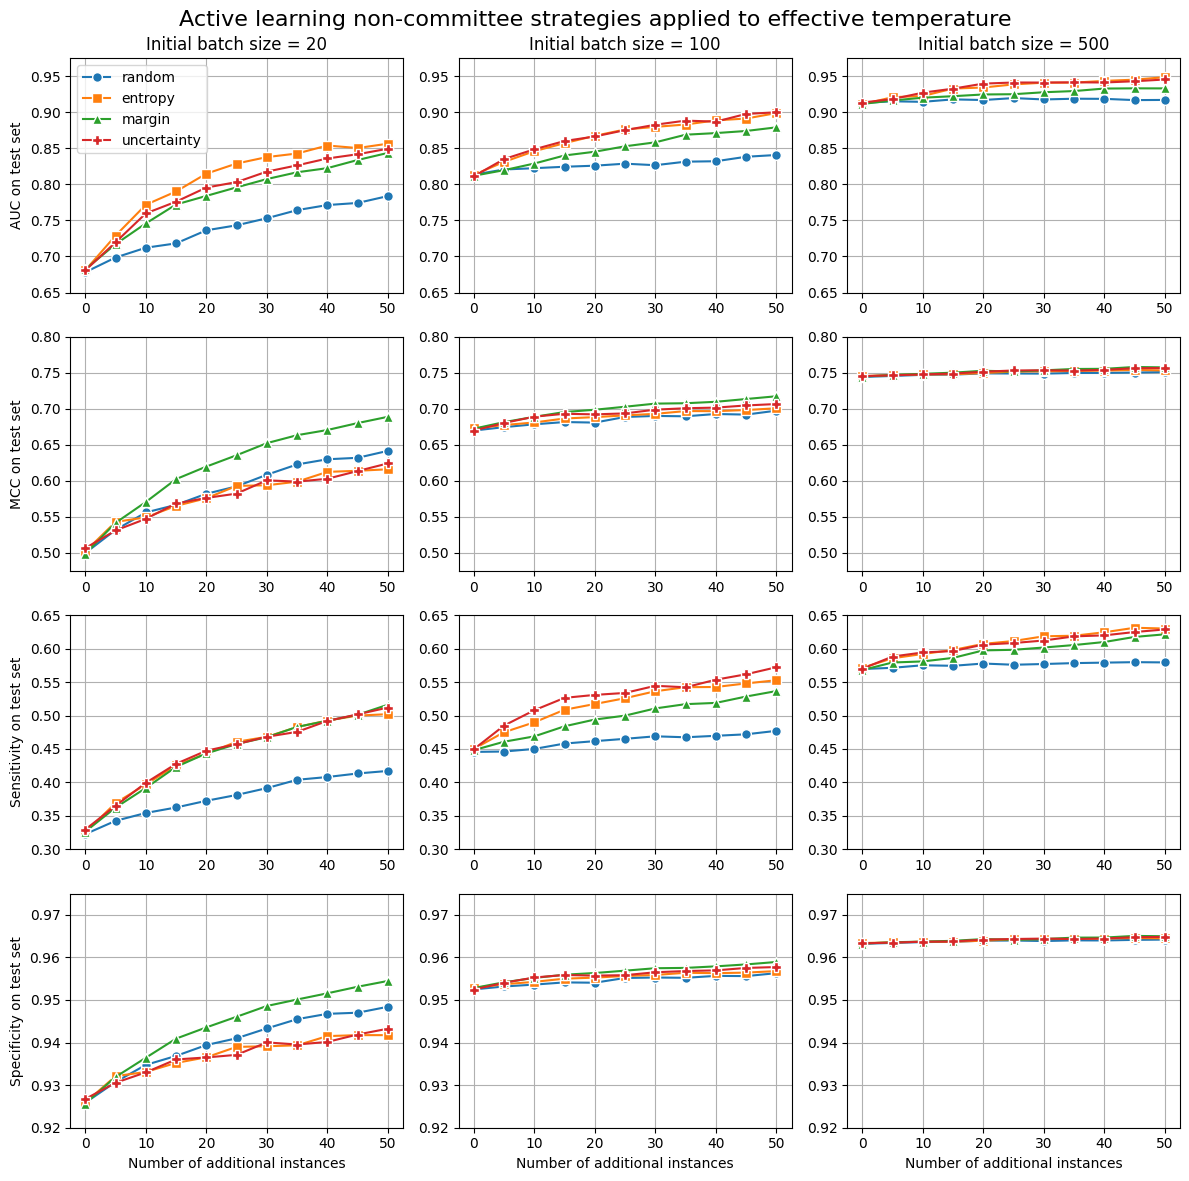

In [3]:
scores = list(results_data.values())[1:4]
y_min = [0.65, 0.4750, 0.3, 0.92]
y_max = [0.975, 0.8, 0.65, 0.975]
fig_title = 'Active learning non-committee strategies applied to effective temperature'
pdf_name = 'teff_non_comm'

u.create_scores_figure(scores, y_min, y_max, fig_title, pdf_name)

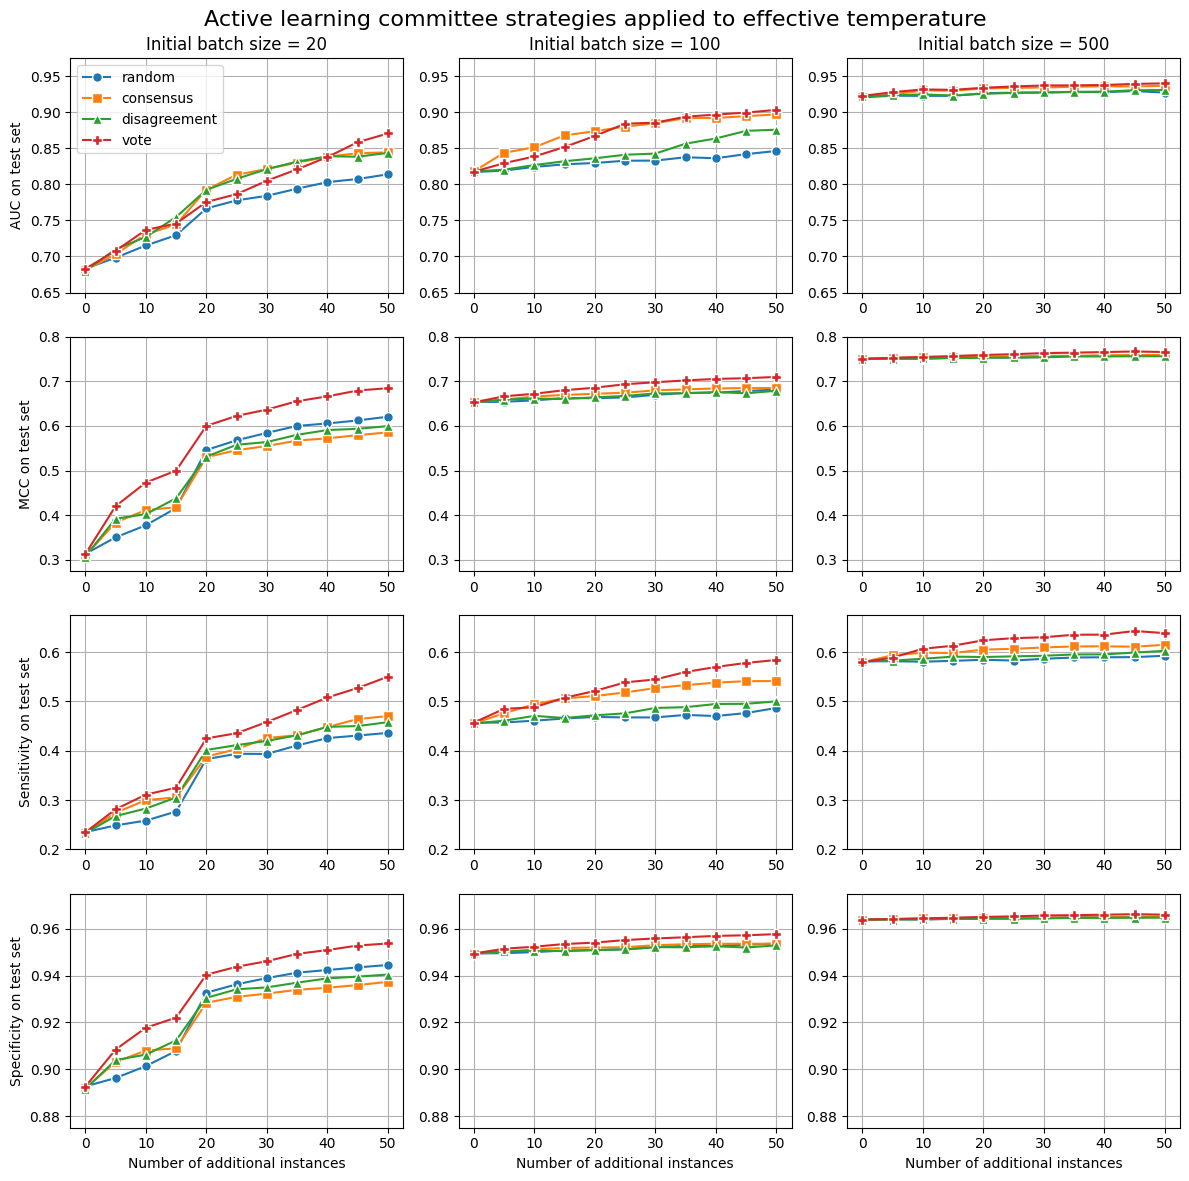

In [9]:
scores = list(results_data.values())[4:7]
y_min = [0.65, 0.275, 0.2, 0.875]
y_max = [0.975, 0.8, 0.675, 0.975]
fig_title = 'Active learning committee strategies applied to effective temperature'
pdf_name = 'teff_comm'

u.create_scores_figure(scores, y_min, y_max, fig_title, pdf_name)

## $\log{g}$

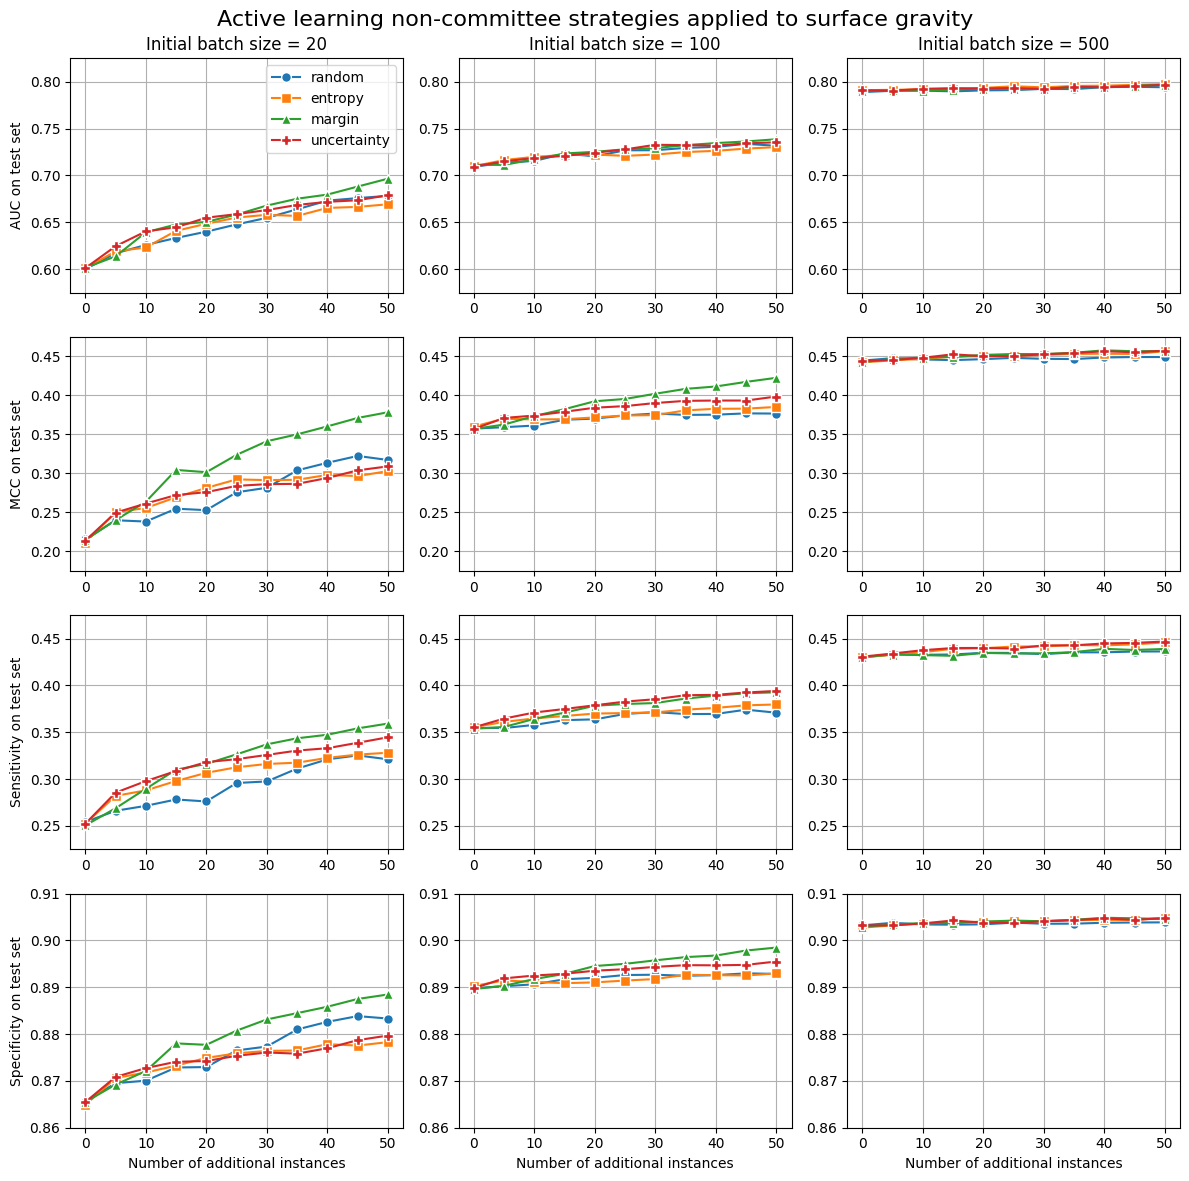

In [17]:
scores = list(results_data.values())[8:11]
y_min = [0.575, 0.175, 0.225, 0.86]
y_max = [0.825, 0.475, 0.475, 0.91]
fig_title = 'Active learning non-committee strategies applied to surface gravity'
pdf_name = 'logg_non_comm'

u.create_scores_figure(scores, y_min, y_max, fig_title, pdf_name)

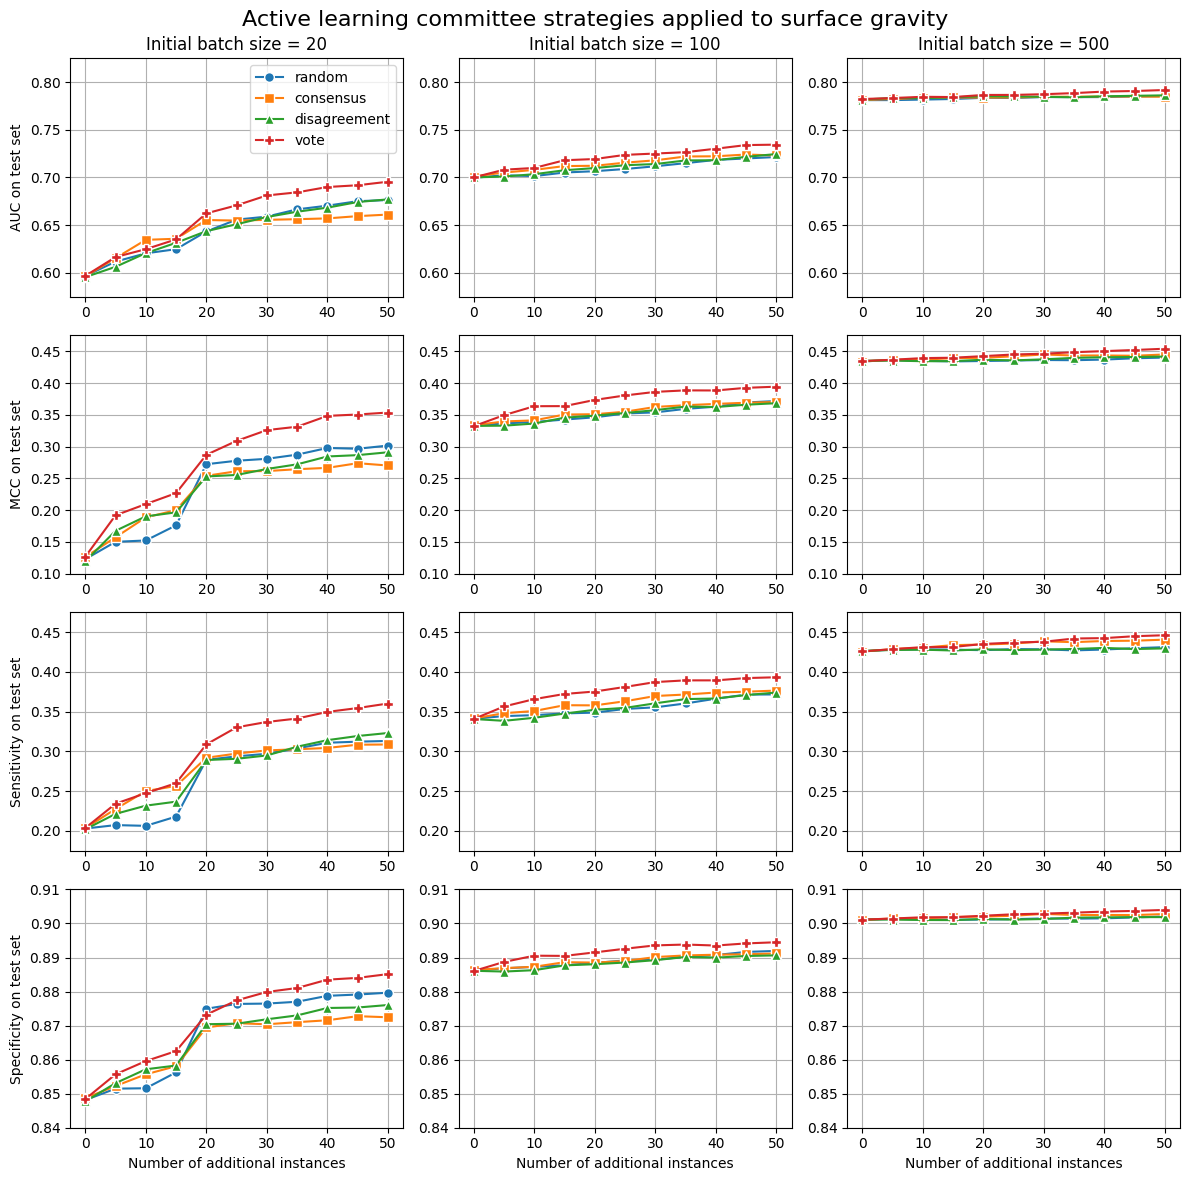

In [21]:
scores = list(results_data.values())[11:14]
y_min = [0.575, 0.1, 0.175, 0.84]
y_max = [0.825, 0.475, 0.475, 0.91]
fig_title = 'Active learning committee strategies applied to surface gravity'
pdf_name = 'logg_comm'

u.create_scores_figure(scores, y_min, y_max, fig_title, pdf_name)

## Fe/H

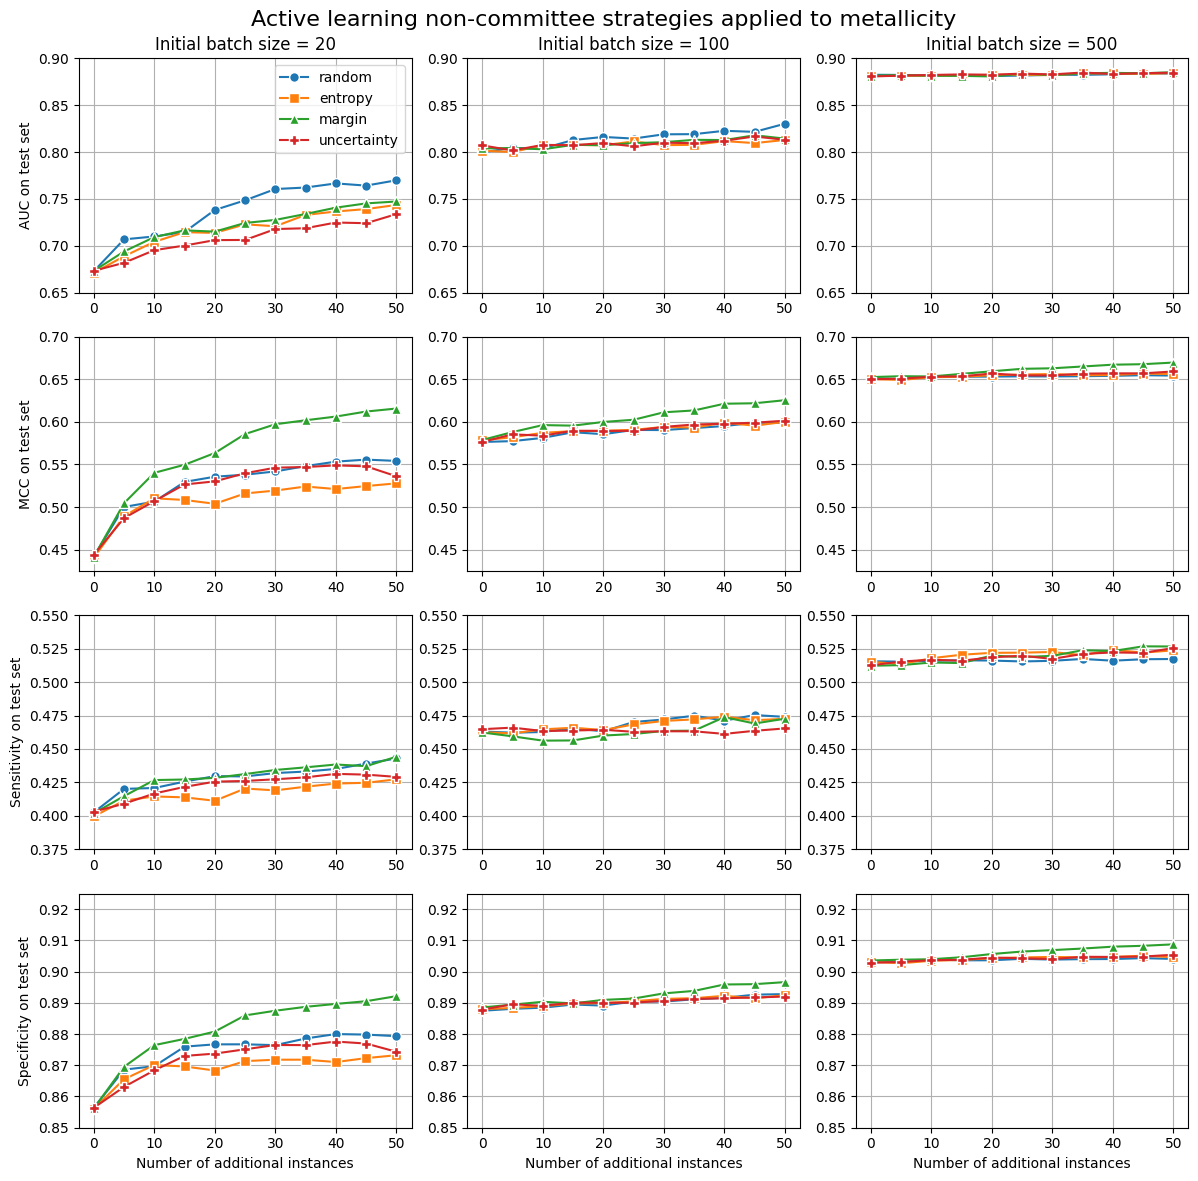

In [27]:
scores = list(results_data.values())[15:18]
y_min = [0.65, 0.425, 0.375, 0.85]
y_max = [0.9, 0.7, 0.55, 0.925]
fig_title = 'Active learning non-committee strategies applied to metallicity'
pdf_name = 'feh_non_comm'

u.create_scores_figure(scores, y_min, y_max, fig_title, pdf_name)

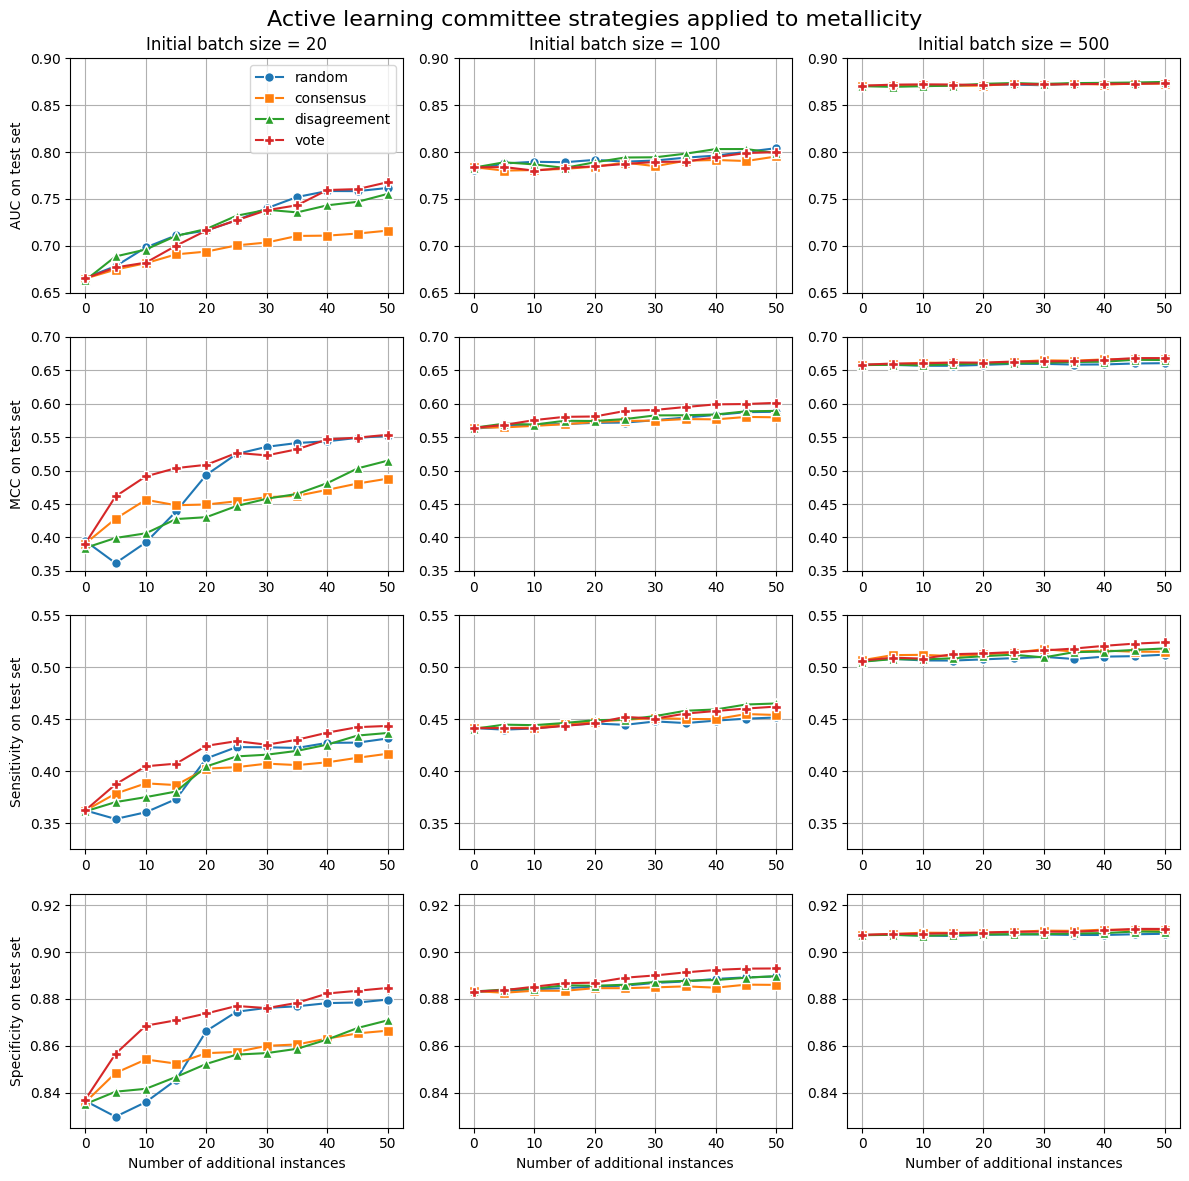

In [30]:
scores = list(results_data.values())[18:21]
y_min = [0.65, 0.35, 0.325, 0.825]
y_max = [0.9, 0.7, 0.55, 0.925]
fig_title = 'Active learning committee strategies applied to metallicity'
pdf_name = 'feh_comm'

u.create_scores_figure(scores, y_min, y_max, fig_title, pdf_name)

# Plotting sensitivity for AL (5%) vs random (10%)

In [32]:
rand_mean, rand_std = results_data['rand_10_percent']
strat_mean, strat_std = results_data['strat_10_percent']
sen_al_mean, sen_al_std = results_data['al_marg_5_percent']

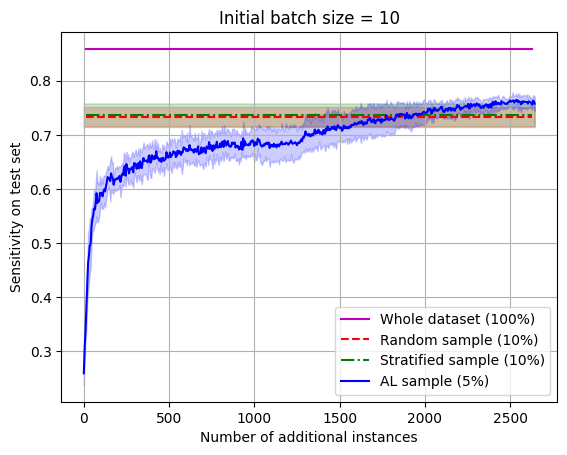

In [33]:
n = sen_al_mean.shape[0] * 5
x = np.arange(0, n, 5)

bl = [0.992198, 0.896279, 0.858892, 0.984937]

plt.axhline(y=bl[2], xmin=0.05, xmax=0.95, color='m', label='Whole dataset (100%)')

plt.axhline(y=rand_mean, xmin=0.05, xmax=0.95, color='r', label='Random sample (10%)', linestyle='--')
plt.fill_between(x, [rand_mean-rand_std]*len(x), [rand_mean+rand_std]*len(x), color='r', alpha=0.2)

plt.axhline(y=strat_mean, xmin=0.05, xmax=0.95, color='g', label='Stratified sample (10%)', linestyle='-.')
plt.fill_between(x, [strat_mean-strat_std]*len(x), [strat_mean+strat_std]*len(x), color='g', alpha=0.2)

plt.plot(x, sen_al_mean, label='AL sample (5%)', color='b')
plt.fill_between(x, sen_al_mean-sen_al_std, sen_al_mean+sen_al_std, color='b', alpha=0.2)

plt.title('Initial batch size = 10')
plt.xlabel('Number of additional instances')
plt.ylabel('Sensitivity on test set')

plt.legend()
plt.grid(True)

plt.savefig('sen_data_perc.pdf');